<h1>Missing values</h1>

Importing Libraries

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import os
from mpl_toolkits.basemap import Basemap,cm
import matplotlib.pyplot as plt

Getting variable's missing values indexes<br> 

In [4]:
def get_var(variable):
    vares = []
    path = "../data/INPUT_AI/"
    for year in os.listdir(path):
        for month in os.listdir(path+"/"+year):
            var_file_path = path + "/" + year + "/" + month + "/" + str(variable) +"_" + year +"{:02d}".format(int(month))+".nc"
            var_file = nc.Dataset(var_file_path)
            var = var_file.variables[str(variable)][:].data
            var[var != -9999.0] = 0
            var[var == -9999.0] = 1
           # #chl = chl.astype(np.float64)
            #ms = mean_squared_error((chl), np.expand_dims(ms,axis=0) )
            vares.append(var[0])
    return np.stack(vares,axis=0)

lons and lats

In [5]:
path = "../data/INPUT_AI/1999/10/chl_199910.nc"
ncfile = nc.Dataset(path)
lons = ncfile.variables['lon'][:].data
lats = ncfile.variables['lat'][:].data
xx, yy = np.meshgrid(lons, lats)

In [24]:
chl = get_var("chl")
uera = get_var("uera")
vera = get_var("vera")
u = get_var("u")
v = get_var("v")
sw = get_var("sw")
sst = get_var("sst")
sla = get_var("sla")

In [30]:
def printmap(var,var_name,vmin=0,vmax=1):
    map = Basemap(projection='merc',llcrnrlon=20,urcrnrlon=380,llcrnrlat=-80,urcrnrlat=80,resolution="l")
    plt.figure(figsize=(19,6))
    label_name = var_name+ " Missing values"


    cmap = plt.get_cmap("summer")
    map.drawcoastlines()
    map.fillcontinents('#cccccc')
    colormesh = map.pcolormesh(xx, yy, var,latlon=True, vmin = vmin, vmax =vmax, cmap=cm.sstanom)
    contour = map.contour(xx, yy,(var),  np.arange(-1, 1, 0.3 ),latlon=True, linestyles = 'solid')
    #map.colorbar(colormesh)
    cb = map.colorbar(colormesh, location='bottom', label=label_name)
    cb.add_lines(contour)
    map.drawmeridians(np.arange(1.5,358.5,100.0),labels=[0,1,1,0]) #longitudes
    map.drawparallels(np.arange(-89.0,88.0,30.0),labels=[1,0,0,1]) #latitudes
    #cb.set_ticks([-10, -5, 5, 30])
    #plt.savefig("./figs/"+label_name+'.png')
    plt.show()

In [26]:
print("Chl missing values percentage = {:2f}%".format((13636936 - chl[chl != 1].shape[0])/13636936))
print("Sla missing values percentage = {:2f}%".format((13636936 - sla[sla != 1].shape[0])/13636936))
print("Sst missing values percentage = {:2f}%".format((13636936 - sst[sst != 1].shape[0])/13636936))
print("Sw missing values percentage = {:2f}%".format((13636936 - sw[sw != 1].shape[0])/13636936))
print("Vera missing values percentage = {:2f}%".format((13636936 - vera[vera != 1].shape[0])/13636936))
print("Uera missing values percentage = {:2f}%".format((13636936 - uera[uera != 1].shape[0])/13636936))
print("V missing values percentage = {:2f}%".format((13636936 - v[v != 1].shape[0])/13636936))
print("V missing values percentage = {:2f}%".format((13636936 - u[u != 1].shape[0])/13636936))

Chl missing values percentage = 0.473624%
Sla missing values percentage = 0.443129%
Sst missing values percentage = 0.000000%
Sw missing values percentage = 0.000000%
Vera missing values percentage = 0.380594%
Uera missing values percentage = 0.380594%
V missing values percentage = 0.549348%
V missing values percentage = 0.549348%


In [27]:
chl = np.sum(chl,axis=0)/214
sla = np.sum(sla,axis=0)/214
sst = np.sum(sst,axis=0)/214
sw = np.sum(sw,axis=0)/214
u = np.sum(u,axis=0)/214
v = np.sum(v,axis=0)/214
uera = np.sum(uera,axis=0)/214
vera = np.sum(vera,axis=0)/214

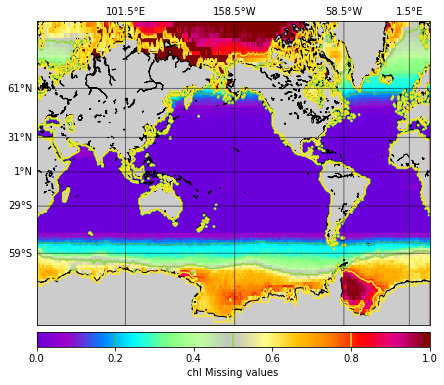

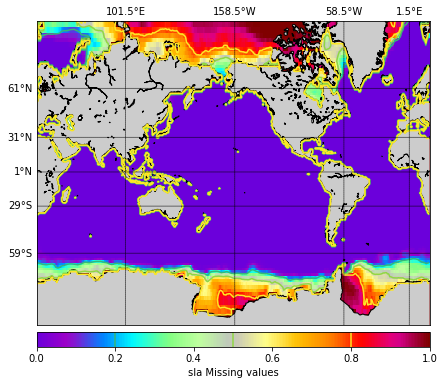

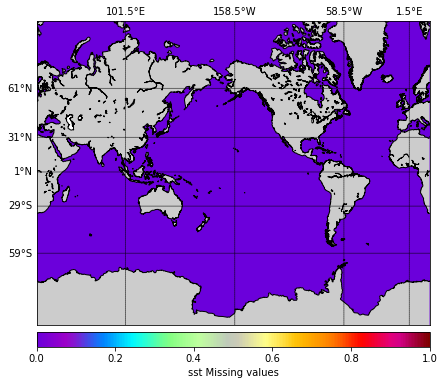

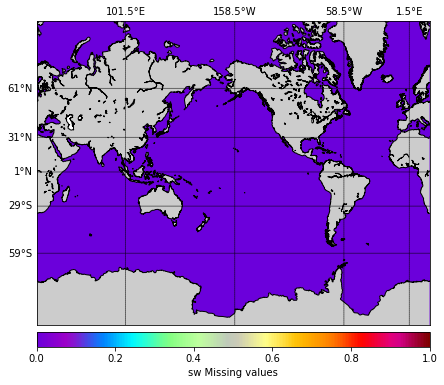

In [31]:
printmap(chl,"chl")
printmap(sla,"sla")
printmap(sst,"sst")
printmap(sw,"sw")

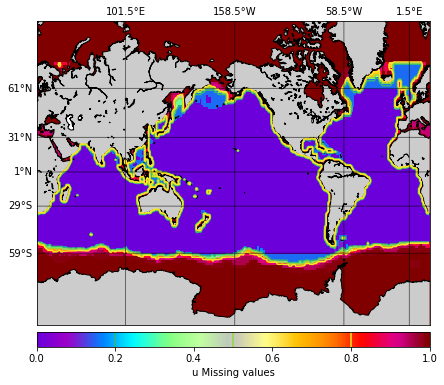

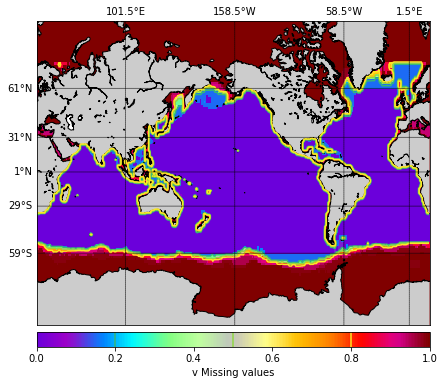

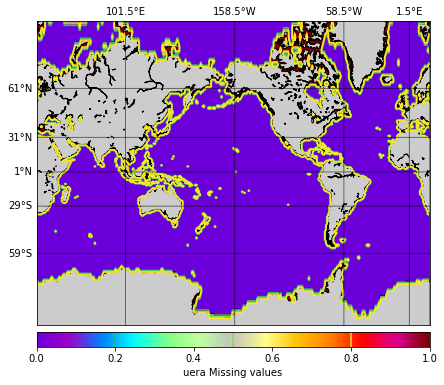

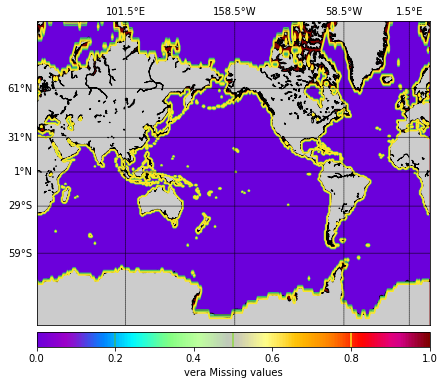

In [32]:
printmap(u,"u")
printmap(v,"v")
printmap(uera,"uera")
printmap(vera,"vera")